<a href="https://colab.research.google.com/github/Spnetic-5/Tabula_iTox/blob/main/Tabula_iTox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A table detection, cell recognition and text extraction algorithm to convert tables in images to excel files**


## The algorithm consists of three parts: the first is the table detection and cell recognition with Open CV, the second the thorough allocation of the cells to the proper row and column and the third part is the extraction of each allocated cell through Optical Character Recognition (OCR) with pytesseract.

In [2]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=2e95e35bb5b2fc071ae16adbbef0c92021adc4cdac262fa510d340f630effd58
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [6]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from google.colab import files

In [7]:
uploaded = files.upload()

Saving 1_AysdJuz4xwRm_aZf9crZeQ.png to 1_AysdJuz4xwRm_aZf9crZeQ.png


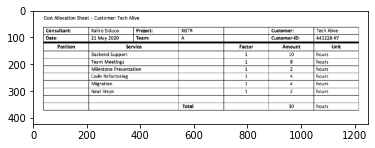

In [8]:
#read your file
file=r'1_AysdJuz4xwRm_aZf9crZeQ.png'
img = cv2.imread(file,0)
img.shape

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('inverted.png',img_bin)

#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [10]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100

# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))

# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

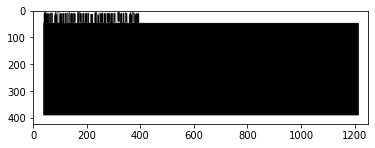

In [12]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("vertical.jpg",vertical_lines)

#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

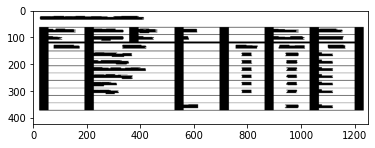

In [14]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)

#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

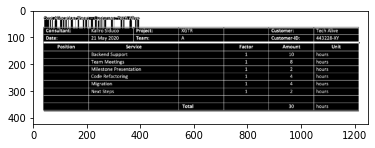

In [15]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("/Users/YOURPATH/img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()